In [1]:
# 导入工具包
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 加载数据
mobike = pd.read_csv('week4.mobike.csv', index_col = 0)

#### 1.数据清洗

In [3]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6427 entries, 439283 to 278179
Data columns (total 14 columns):
user_id              6427 non-null int64
start_time           6427 non-null object
end_time             6427 non-null object
timeduration         6427 non-null int64
bikeid               6427 non-null int64
tripduration         6427 non-null int64
from_station_id      6427 non-null int64
from_station_name    6427 non-null object
to_station_id        6427 non-null int64
to_station_name      6427 non-null object
usertype             6427 non-null object
gender               5938 non-null object
birthyear            5956 non-null float64
age                  6427 non-null object
dtypes: float64(1), int64(6), object(7)
memory usage: 753.2+ KB


* user_id：用户编码
* start_time：开始时间
* end_time：结束时间
* timeduration：骑行时长
* bikeid：自行车编码
* tripduration：骑行距离
* from_station_id：开始站编码
* from_station_name：开始站名字
* to_station_id：结束站编码
* to_station_name：结束站名字
* usertype：用户种类
* gender：性别
* birthyear：出生年份
* age：年龄

* `gender`和`birthyear`有少量空缺值。
* `user_id`、`start_time`、`end_time`、`bike_id`、`tripduration`、`age`等都有数据类型错误。

In [4]:
mobike.head()

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
439283,21499218,11/14/2018 7:37,11/14/2018 7:44,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
603317,21694389,12/18/2018 19:02,12/18/2018 19:10,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
109957,21110722,10/9/2018 12:37,10/9/2018 12:55,18,2231,1090,163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
428082,21485409,11/12/2018 12:30,11/12/2018 12:40,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
395437,21445994,11/7/2018 7:29,11/7/2018 7:35,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40


In [5]:
# 删除对业务分析没有实际作用的变量
mobike.from_station_name.unique()

array(['Greenview Ave & Diversey Pkwy', 'Franklin St & Lake St',
       'Damen Ave & Clybourn Ave', 'Racine Ave & Belmont Ave',
       'Clinton St & Madison St', 'Wabash Ave & 9th St',
       'Millennium Park', 'Franklin St & Chicago Ave',
       'Kingsbury St & Erie St', 'Jefferson St & Monroe St',
       'Clarendon Ave & Gordon Ter', 'California Ave & Altgeld St',
       'Cottage Grove Ave & 67th St', 'Rush St & Superior St',
       'Sedgwick St & Webster Ave', 'Morgan St & Polk St',
       'Mies van der Rohe Way & Chicago Ave',
       'Orleans St & Chestnut St (NEXT Apts)',
       'Stetson Ave & South Water St', 'Halsted St & Dickens Ave',
       'Lakefront Trail & Wilson Ave', 'Dearborn St & Monroe St',
       'Halsted St & Wrightwood Ave', 'Morgan St & Lake St',
       'Michigan Ave & Lake St', 'Indiana Ave & Roosevelt Rd',
       'Lakeview Ave & Fullerton Pkwy', 'Cityfront Plaza Dr & Pioneer Ct',
       'Sheffield Ave & Webster Ave', 'Damen Ave & Cortland St',
       'Clark St & 

In [6]:
mobike.drop(['from_station_name','to_station_name','from_station_id','to_station_id','bikeid'], axis = 1, inplace = True)
mobike.head()

,user_id,start_time,end_time,timeduration,tripduration,usertype,gender,birthyear,age
439283,21499218,11/14/2018 7:37,11/14/2018 7:44,7,436,Subscriber,Male,1982.0,37
603317,21694389,12/18/2018 19:02,12/18/2018 19:10,7,445,Subscriber,Male,1988.0,31
109957,21110722,10/9/2018 12:37,10/9/2018 12:55,18,1090,Customer,Male,1989.0,30
428082,21485409,11/12/2018 12:30,11/12/2018 12:40,9,581,Subscriber,Female,1989.0,30
395437,21445994,11/7/2018 7:29,11/7/2018 7:35,6,390,Subscriber,Male,1979.0,40


In [7]:
mobike.describe()

,user_id,timeduration,tripduration,birthyear
count,6.427000e+03,6427.000000,6.427000e+03,5956.000000
mean,2.135519e+07,11.778902,1.060471e+03,1982.488583
std,2.181294e+05,9.692236,1.456811e+04,11.147859
min,2.098358e+07,0.000000,6.100000e+01,1906.000000
25%,2.116805e+07,5.000000,3.490000e+02,1977.000000
50%,2.135114e+07,9.000000,5.590000e+02,1986.000000
75%,2.154376e+07,15.000000,9.320000e+02,1991.000000
max,2.174223e+07,59.000000,1.139070e+06,2002.000000


* `birthyear`存在异常值，可以用`age`验证。
* `timeduration`最小值为0。

In [8]:
mobike.duplicated().sum()

0

* 没有重复数据

In [9]:
mobike['user_id'].nunique()

6427

* 不存在重复用户，所以不需要进行聚类，直接删除`user_id`即可。

In [10]:
mobike.drop('user_id', axis = 1, inplace = True)

In [11]:
# 转换数据类型
mobike['start_time'] = pd.to_datetime(mobike['start_time'])
mobike['end_time'] = pd.to_datetime(mobike['end_time'])

In [12]:
# 查看时间数据的具体年份
mobike['start_time'].dt.year.unique()

array([2018], dtype=int64)

In [13]:
# 查看时间数据的具体
mobike['start_time'].dt.month.unique()

array([11, 12, 10], dtype=int64)

In [14]:
# 提取开始时间里的周中的第几天，Monday=0, Sunday=6和小时
mobike['dayofweek'] = mobike['start_time'].dt.dayofweek
mobike['hour'] = mobike['start_time'].dt.hour

In [15]:
mobike.head()

,start_time,end_time,timeduration,tripduration,usertype,gender,birthyear,age,dayofweek,hour
439283,2018-11-14 07:37:00,2018-11-14 07:44:00,7,436,Subscriber,Male,1982.0,37,2,7
603317,2018-12-18 19:02:00,2018-12-18 19:10:00,7,445,Subscriber,Male,1988.0,31,1,19
109957,2018-10-09 12:37:00,2018-10-09 12:55:00,18,1090,Customer,Male,1989.0,30,1,12
428082,2018-11-12 12:30:00,2018-11-12 12:40:00,9,581,Subscriber,Female,1989.0,30,0,12
395437,2018-11-07 07:29:00,2018-11-07 07:35:00,6,390,Subscriber,Male,1979.0,40,2,7


In [16]:
# 检查骑行时间为 0的数据
mobike[mobike['timeduration'] < 1]

,start_time,end_time,timeduration,tripduration,usertype,gender,birthyear,age,dayofweek,hour
109113,2018-10-09 11:29:00,2018-10-09 12:29:00,0,3616,Customer,NaN,NaN,,1,11
72232,2018-10-06 10:15:00,2018-10-06 11:15:00,0,3606,Customer,NaN,NaN,,5,10
69595,2018-10-05 18:27:00,2018-10-05 19:28:00,0,3650,Customer,Male,1989.0,30,4,18
302629,2018-10-27 15:33:00,2018-10-27 16:34:00,0,3634,Customer,NaN,NaN,,5,15
592619,2018-12-17 09:17:00,2018-12-17 10:18:00,0,3652,Subscriber,Male,1988.0,31,0,9


In [17]:
# 将骑行时间为 0的全部换成 60min
mobike['timeduration'] = mobike['timeduration'].replace(0,60)

In [18]:
mobike['tripduration'] = mobike['tripduration'].astype(int)
# mobike['tripduration'] = mobike['tripduration'].str.replace(',','').astype(int)

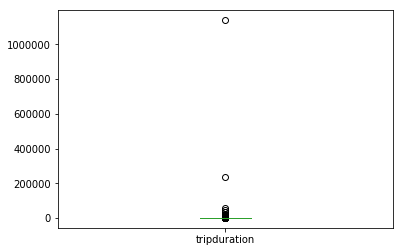

In [19]:
mobike['tripduration'].plot(kind = 'box')

* `tripduration`存在异常值。

In [20]:
# 查看usertype是否有大小写不一致情况
mobike['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

* 没有大小不一致的问题。

In [21]:
mobike.gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [22]:
# 填充性别中的空缺值
mobike['gender'] = mobike.gender.fillna('Unknown')

In [23]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6427 entries, 439283 to 278179
Data columns (total 10 columns):
start_time      6427 non-null datetime64[ns]
end_time        6427 non-null datetime64[ns]
timeduration    6427 non-null int64
tripduration    6427 non-null int32
usertype        6427 non-null object
gender          6427 non-null object
birthyear       5956 non-null float64
age             6427 non-null object
dayofweek       6427 non-null int64
hour            6427 non-null int64
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3), object(3)
memory usage: 527.2+ KB


In [24]:
mobike['age'].unique()

array(['37', '31', '30', '40', '25', '48', ' ', '28', '27', '34', '33',
       '26', '20', '23', '55', '22', '54', '52', '57', '29', '39', '51',
       '32', '49', '43', '58', '42', '61', '35', '41', '63', '50', '38',
       '36', '44', '62', '19', '59', '45', '46', '56', '21', '24', '47',
       '66', '64', '77', '69', '60', '68', '70', '53', '113', '73', '18',
       '67', '65', '71', '79', '17', '101', '74', '72'], dtype=object)

* `age`中虽然没有空缺值，但是有`' '`这样的空值。

In [25]:
# 检查年龄空值对应的出生年份
mobike[mobike['age'] == ' ']['birthyear'].unique()

array([nan])

* `age`中的“空值”刚好对`birthyear`的空值。

In [26]:
# 检查出生年份的空值对应的年龄
mobike[mobike['birthyear'].isna()]
mobike[mobike['birthyear'].isna()]['age'].unique()

array([' '], dtype=object)

In [27]:
(mobike[mobike['age'] == ' '].index == mobike[mobike['birthyear'].isna()].index).all()

True

* `age`和`birthyear`的空缺行是一样的，可将`birthyear`删除。

In [28]:
mobike.drop('birthyear', axis = 1, inplace = True)

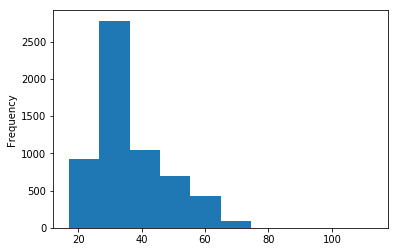

In [29]:
# age的分布图
mobike[mobike['age'] != ' ']['age'].astype(int).plot(kind = 'hist')

* 年龄大部分在18-65之间。

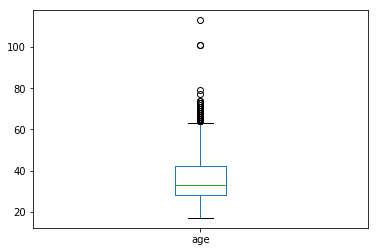

In [30]:
mobike[mobike['age'] != ' ']['age'].astype(int).plot(kind = 'box')

* 年龄存在离群值。

In [31]:
# 年龄的中位数
age_median = int(mobike[mobike['age'] != ' ']['age'].astype(int).median())

In [32]:
# 用年龄的中位数填充年龄的空缺值
mobike['age'] = mobike.age.str.replace(' ', str(age_median)).astype(int)

In [33]:
# 去除离群值
mobike = mobike[mobike.age < 80]

In [34]:
mobike['age'].describe()

count    6424.000000
mean       36.221980
std        10.669314
min        17.000000
25%        29.000000
50%        33.000000
75%        41.000000
max        79.000000
Name: age, dtype: float64

#### 2.单变量分析

In [35]:
mobike['timeduration'].describe()

count    6424.000000
mean       11.825031
std         9.777402
min         1.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        60.000000
Name: timeduration, dtype: float64

* 骑行时间最小值1min，最大值60min，平均时长12min。

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


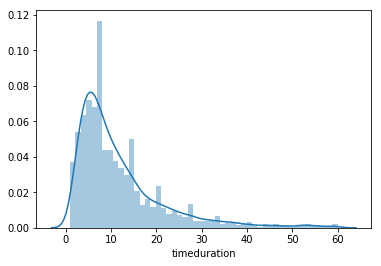

In [36]:
# 骑行时间分布图
sns.distplot(mobike['timeduration'])

* 数据大部分分布在10min左右，说明短途使用单车的人较多。

In [37]:
mobike['tripduration'].describe()

count    6.424000e+03
mean     1.060589e+03
std      1.457150e+04
min      6.100000e+01
25%      3.490000e+02
50%      5.590000e+02
75%      9.320000e+02
max      1.139070e+06
Name: tripduration, dtype: float64

* 骑行距离的三分位数与最大值之间相差较大，存在离群值。

In [38]:
# 自行车一个小时至少能骑10km, 查看离群值个数
len(mobike[mobike['tripduration'] > 10000]) 

19

In [39]:
# 去除离群值
mobike = mobike[mobike['tripduration'] <= 10000]

In [40]:
mobike.isnull().sum()

start_time      0
end_time        0
timeduration    0
tripduration    0
usertype        0
gender          0
age             0
dayofweek       0
hour            0
dtype: int64

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


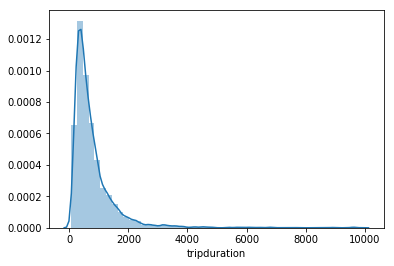

In [41]:
# 骑行距离分布图
sns.distplot(mobike['tripduration']) 
# mobike['tripduration'].plot(kind = 'hist')

* 骑行距离大部分在1km之内。

In [42]:
# 订阅用户和普通用户的分布
mobike['usertype'].value_counts(1)

Subscriber    0.895863
Customer      0.104137
Name: usertype, dtype: float64

* 大部分人办了月卡或者年卡。

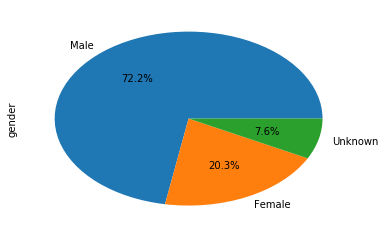

In [43]:
# 性别饼图
mobike['gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

* 男性居多，性别未知的比较少，可以删除。

In [44]:
# 删除未知性别
mobike = mobike[mobike['gender'] != 'Unknown']

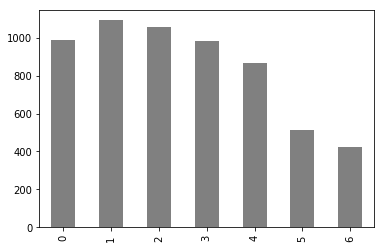

In [45]:
mobike['dayofweek'].value_counts().sort_index().plot(kind = 'bar', color = 'grey')

* 显然大部分人在工作日使用单车。

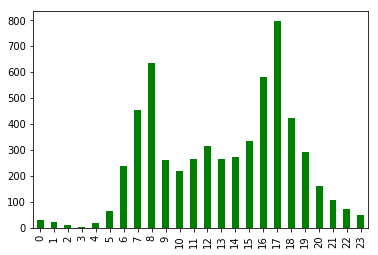

In [46]:
mobike['hour'].value_counts().sort_index().plot(kind = 'bar', color = 'green')

* 大部分骑行开始时间在晚上五点和早上八点，上下班的时间。

#### 3.模型建立

In [47]:
from sklearn.preprocessing import scale
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [48]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5921 entries, 439283 to 278179
Data columns (total 9 columns):
start_time      5921 non-null datetime64[ns]
end_time        5921 non-null datetime64[ns]
timeduration    5921 non-null int64
tripduration    5921 non-null int32
usertype        5921 non-null object
gender          5921 non-null object
age             5921 non-null int32
dayofweek       5921 non-null int64
hour            5921 non-null int64
dtypes: datetime64[ns](2), int32(2), int64(3), object(2)
memory usage: 416.3+ KB


In [49]:
# 将类别变量转化为数字型哑变量
mobike = pd.get_dummies(mobike, drop_first = True)
mobike.head()

,start_time,end_time,timeduration,tripduration,age,dayofweek,hour,usertype_Subscriber,gender_Male
439283,2018-11-14 07:37:00,2018-11-14 07:44:00,7,436,37,2,7,1,1
603317,2018-12-18 19:02:00,2018-12-18 19:10:00,7,445,31,1,19,1,1
109957,2018-10-09 12:37:00,2018-10-09 12:55:00,18,1090,30,1,12,0,1
428082,2018-11-12 12:30:00,2018-11-12 12:40:00,9,581,30,0,12,1,0
395437,2018-11-07 07:29:00,2018-11-07 07:35:00,6,390,40,2,7,1,1


In [50]:
# 相关性
mobike[['timeduration','tripduration','age','usertype_Subscriber','gender_Male']].corr()

,timeduration,tripduration,age,usertype_Subscriber,gender_Male
timeduration,1.000000,0.812572,0.034341,-0.207376,-0.054640
tripduration,0.812572,1.000000,0.026872,-0.309394,-0.062267
age,0.034341,0.026872,1.000000,0.045115,0.071930
usertype_Subscriber,-0.207376,-0.309394,0.045115,1.000000,0.025245
gender_Male,-0.054640,-0.062267,0.071930,0.025245,1.000000


* timeduration 和 tripduration 强相关，选其一
* 基于用户的行为偏好以及用户的个人信息，选择变量timeduration、age、usertype、gender建立模型

In [51]:
x = mobike[['timeduration','age','usertype_Subscriber','gender_Male']]

In [52]:
# 使用Z-score将数据标准化
# mobike['z_timeduration'] = (mobike_1.timeduration - mobike_1.timeduration.mean()) / mobike_1.timeduration.std()
# x = mobike

In [53]:
# 使用sklearn中的preprocessing将数据标准化
x = pd.DataFrame(scale(x))

In [54]:
# 模型建立，先尝试分为3类
model = cluster.KMeans(3,random_state = 10)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [55]:
# 提取标签，查看分类结果
mobike['cluster'] = model.labels_

In [56]:
mobike.head()

,start_time,end_time,timeduration,tripduration,age,dayofweek,hour,usertype_Subscriber,gender_Male,cluster
439283,2018-11-14 07:37:00,2018-11-14 07:44:00,7,436,37,2,7,1,1,1
603317,2018-12-18 19:02:00,2018-12-18 19:10:00,7,445,31,1,19,1,1,1
109957,2018-10-09 12:37:00,2018-10-09 12:55:00,18,1090,30,1,12,0,1,0
428082,2018-11-12 12:30:00,2018-11-12 12:40:00,9,581,30,0,12,1,0,2
395437,2018-11-07 07:29:00,2018-11-07 07:35:00,6,390,40,2,7,1,1,1


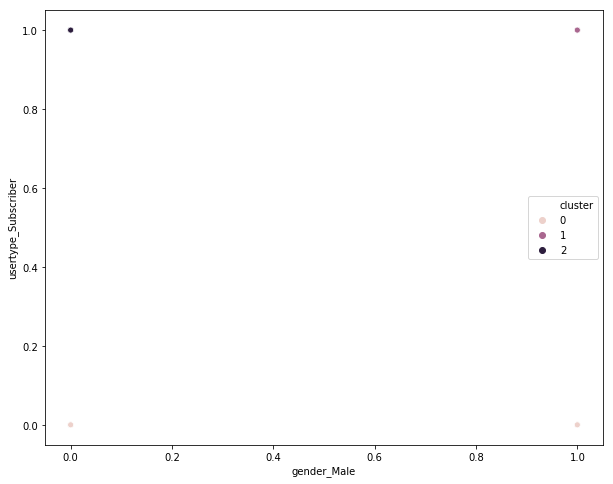

In [57]:
# 绘制散点图，查看分群结果
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'gender_Male',y = 'usertype_Subscriber',hue = 'cluster',data = mobike)

* 第0组的用户类型是Customer, 性别都有；
* 第1组的用户类型是Subscribe，性别是男；
* 第2组的用户类型是Subscribe，性别是女。

In [58]:
# 轮廓系数评估模型效果
x_cluster = model.fit_predict(x) # 个体与群的距离 
score = metrics.silhouette_score(x,x_cluster) # 评分越高，个体与群越近
print('聚类个数为3时，轮廓系数：', score)

聚类个数为3时，轮廓系数： 0.47429415748689113


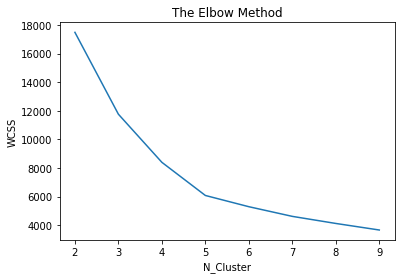

In [59]:
# 肘方法评估聚类个数n
wcss = []
n_clusters = list(range(2,10)) 
for n in n_clusters: # 循环使用不同n测试结果
    model = cluster.KMeans(n,random_state = 10) 
    model.fit(x) 
    x_cluster = model.fit_predict(x)
    wcss.append(model.inertia_)
plt.plot(n_clusters, wcss)
plt.xlabel('N_Cluster');
plt.ylabel('WCSS');
plt.title('The Elbow Method')
plt.show()

In [60]:
# 肘方法评估聚类个数：快速下降趋于平缓下降的转折点是聚类的最好情况
model = cluster.KMeans(n_clusters = 5, random_state = 10)
x_cluster = model.fit_predict(x)
score = metrics.silhouette_score(x,x_cluster)
print('聚类个数为5时，轮廓系数：', score)

聚类个数为5时，轮廓系数： 0.48890989023167036


In [61]:
# 导出聚类结果，做业务解读
centers = pd.DataFrame(model.cluster_centers_)
centers.to_csv('center_5.csv')

In [62]:
# 提取标签，查看分类结果
mobike['cluster'] = model.labels_
mobike['cluster'].value_counts(1)

1    0.482013
2    0.198277
3    0.187299
0    0.097956
4    0.034454
Name: cluster, dtype: float64

In [63]:
centers.columns = ['timeduration','age','usertype_Subscriber','gender_Male']
print(centers)

   timeduration       age  usertype_Subscriber  gender_Male
0      2.007489 -0.085853             0.188900     0.317339
1     -0.374953 -0.485535             0.188900     0.529877
2     -0.079291 -0.182153             0.188900    -1.887229
3     -0.202969  1.531181             0.188900     0.492825
4      1.097813 -0.238828            -5.293818    -0.133642


* 行：每一行是系统认为的群组，即0群，1群，2群
* 列：重点关注每一列的数据，标注出绝对值较大的数字，如果人群在某个特征变量上数据的绝对值较大，就说明这群人在这个特征上又叫明显的区分度
* 0群是骑行时间较长的用户，占比9.8%；
* 3群是年龄较大的用户，占比18.7%；
* 4群是非订阅用户，占比3.4%；
* 2群是女性用户，占比18.7%；
* 1群是男性、订阅、年轻、骑行时间短的用户，占比48.2%，是摩拜的核心用户群。

In [64]:
# 尝试将开始时间（小时）分箱，将上下班时间分离出来
bins = [0,6,9,16,19,24]
mobike['start_level'] = pd.cut(mobike.hour, bins, right = False)
mobike['start_level'].value_counts(1)

[9, 16)     0.327985
[16, 19)    0.304678
[6, 9)      0.224624
[19, 24)    0.116197
[0, 6)      0.026516
Name: start_level, dtype: float64

In [65]:
mobike[mobike.cluster == 1].start_level.value_counts(1)

[9, 16)     0.312894
[16, 19)    0.311493
[6, 9)      0.222495
[19, 24)    0.125438
[0, 6)      0.027680
Name: start_level, dtype: float64

* 核心用户的骑行时间和整体一致

#### 4.优化模型

In [66]:
# 将所有变量保留
x = mobike[['timeduration','age','usertype_Subscriber','gender_Male','dayofweek','hour']]

In [67]:
# 使用sklearn中的preprocessing将数据标准化
x = pd.DataFrame(scale(x))

In [68]:
# 模型建立,还是分为5类
model = cluster.KMeans(5,random_state = 10)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [69]:
# 提取标签，查看分类结果
mobike['cluster_1'] = model.labels_

In [70]:
mobike.head()

,start_time,end_time,timeduration,tripduration,age,dayofweek,hour,usertype_Subscriber,gender_Male,cluster,start_level,cluster_1
439283,2018-11-14 07:37:00,2018-11-14 07:44:00,7,436,37,2,7,1,1,1,"[6, 9)",2
603317,2018-12-18 19:02:00,2018-12-18 19:10:00,7,445,31,1,19,1,1,1,"[19, 24)",1
109957,2018-10-09 12:37:00,2018-10-09 12:55:00,18,1090,30,1,12,0,1,4,"[9, 16)",3
428082,2018-11-12 12:30:00,2018-11-12 12:40:00,9,581,30,0,12,1,0,2,"[9, 16)",0
395437,2018-11-07 07:29:00,2018-11-07 07:35:00,6,390,40,2,7,1,1,1,"[6, 9)",2


In [71]:
# 轮廓系数评估模型效果
x_cluster = model.fit_predict(x) # 个体与群的距离 
score = metrics.silhouette_score(x,x_cluster) # 评分越高，个体与群越近
print('聚类个数为5时，轮廓系数：', score)

聚类个数为5时，轮廓系数： 0.23815229538963212


* 没有达到优化效果，轮廓系数较低

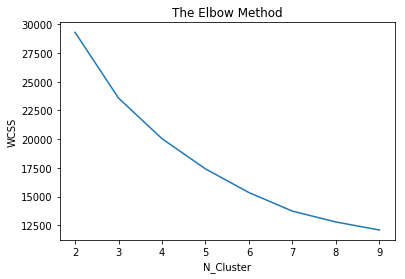

In [72]:
# 肘方法评估聚类个数n
wcss = []
n_clusters = list(range(2,10)) 
for n in n_clusters: # 循环使用不同n测试结果
    model = cluster.KMeans(n,random_state = 10) 
    model.fit(x) 
    x_cluster = model.fit_predict(x)
    wcss.append(model.inertia_)
plt.plot(n_clusters, wcss)
plt.xlabel('N_Cluster');
plt.ylabel('WCSS');
plt.title('The Elbow Method')
plt.show()

In [73]:
# 将聚类个数改为3
model = cluster.KMeans(n_clusters = 3, random_state = 10)
x_cluster = model.fit_predict(x)
score = metrics.silhouette_score(x,x_cluster)
print('聚类个数为3时，轮廓系数：', score)

聚类个数为3时，轮廓系数： 0.2941013983221269


* 仍然没有达到优化效果，轮廓系数较低

#### 5.结论

摩拜单车的核心用户群是男性，他们会办月卡或者年卡，年龄较小，骑行时间较短，经常在上下班的时间使用，占比48.2%。因此为了扩大用户群体，我们可以在特定节日推出办卡优惠活动；在通勤时间点增加各小区门口、地铁门口的车辆的投放。